# Solución tarea base de datos de biblioteca

In [ ]:
########### Solución 1
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
        ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 	3, 24.99]]

min_order = 100
invoice_totals = list(map(lambda x: x if x[1] >= min_order else (x[0], x[1] + 10), 
                 map(lambda x: (x[0],x[2] * x[3]), orders)))
print(invoice_totals)

In [ ]:
########### Solución 2
from functools import reduce

orders = [ [1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
           [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
           [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]

min_order = 100
invoice_totals = list(map(lambda x: [x[0]] + list(map(lambda y: y[1]*y[2] if y[1]*y[2]>=min_order else y[1]*y[2] +10 , x[1:])), orders))
invoice_totals = list(map(lambda x: [x[0]] + [reduce(lambda a,b: a + b, x[1:])], invoice_totals))
invoice_totals = list(map(lambda x: x if x[1] >= min_order else (x[0], x[1] + 10), invoice_totals))

print (invoice_totals)

# Introducción

En las sesiones previas, hemos considerado diferentes familias de modelos que se puede usar como ingrediente clave para construir un simulador Monte Carlo. Aquí consideramos el lado cuantitativo de la moneda: después de seleccionar una estructura de modelo, ¿cómo debemos estimar sus parámetros? Por lo tanto, entramos en el dominio de estadística inferencial, mediante la cual, dada una muestra de datos observados, participamos en tareas cada vez más difíciles: 
- Encontrar estimaciones de puntos e intervalos de momentos básicos como el valor esperado y varianza *(Pruebas de hipótesis e intervalos de confianza)*.
- Estimar los parámetros de una distribución de probabilidad posiblemente complicada
- Estimar los parámetros de un modelo de serie temporal

## Estadística inferencial básica

### 1. Intervalos de confianza

La mayoría de nosotros conoce las estadística inferencial mediante el cálculo de un intervalo de confianza para un valor esperado $\mu$. Este concepto es relevante en ambos extremos de una simulación Monte Carlo, ya que solía definir las variables aleatorias de entrada, así como analizar la salida. Dada una muestra $X_i, i = 1,. . . , n$ de i.i.d. variables aleatorias (independientes e idénticamente distribuidas), el simulacro es el siguiente:
1. Calcular la media y varianza de la muestra
$$ \bar X ={1\over n}\sum_{i=1}^nX_i,\qquad S^2={1\over n-1}\sum_{i=1}^n (X_i-\bar X )^2$$
2. Escoger un nivel de confianza $(1-\alpha)$ y tomar el correspondiente cuantil $t_{n-1,1-\alpha/2}$ de la distribución $t$ con $n-1$ grados de libertad.
3. Calcular el intervalo de confianza
$$\bar X \pm t_{n-1,1-\alpha/2}{S\over\sqrt{n}}$$

Este procedimiento es tan fácil de realizar que uno tiende a olvidar que se basa en algunas suposiciones importantes. Las siguientes observaciones están en orden:
- Estrictamente hablando, el procedimiento anterior es correcto solo para variables aleatorias normales. De hecho, si las variables $X_i \sim N (\mu, \sigma^2)$ son independientes, entonces es cierto que la siguiente estadística estandarizada es normal:
$$Z={\bar X -\mu \over \sigma/\sqrt{n}}\sim N\bigg(\mu,{\sigma^2\over n}\bigg)$$

Si nosotros reemplazamos $\sigma$ por su contraparte $S$, encontramos una distribución *$t$ student*
$$T={\bar X -\mu \over S/\sqrt{n}}\sim t_{n-1}$$
El cual implica
$$P\{-t_{n-1,1-\alpha/2}\leq T \leq t_{n-1,1-\alpha/2}\} = 1-\alpha$$

Al reordenar esta relación obtenemos el intervalo de confianza dado anteriormente. Una gran parte de las estadísticas inferenciales se basa en resultados de distribución similares. Si aplicamos el procedimiento a una **distribución diferente**, lo que encontramos es, en el mejor de los casos, una buena aproximación para una muestra **adecuadamente grande**; con una muestra pequeña y una distribución sesgada, deberíamos repetir el ejercicio para las características específicas de esa distribución.

- También es muy importante enfatizar el rol de la independencia. Es la independencia en la muestra lo que nos permite escribir
$$Var(\bar X)={\sigma^2 \over n}$$

- Al analizar el resultado de una simulación Monte Carlo, el tamaño de la muestra suele ser bastante grande. Por lo tanto, generalmente reemplazamos los cuantiles de la distribución $t$ con los cuantiles $z_{1-\alpha/2}$ de la distribución normal estándar. Sin embargo, esto no necesita aplicarse al análisis de datos de entrada.

# Intervalos de confianza en python

Utilizando la librería estadística `scipy.stats` y utilizando la función `t.intervar(confianza, len(a)-1, loc=np.mean(a), scale=st.sem(a))`, se puede calcula un intervalo de confianza con un nivel de confianza definido en confianza, para un vector de entrada `a`. Se puede utilizar intervalos con los cuantiles de la normal estándar usando `st.norm.interval(confianza, loc=np.mean(a), scale=st.sem(a))`

In [44]:
import numpy as np
import scipy.stats as st     # Librería estadística
import matplotlib.pyplot as plt

In [29]:
np.random.seed(55555)
media = 10; sd = 20; N = 200
confianza = 0.95
X = np.random.normal(media,sd,N)
# st.sem
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada' ,np.mean(X))

Con una confianza de 0.95 la media estará en el intervalo t,
 (6.9453418112953438, 12.429320582324728)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (6.9620173671153029, 12.412645026504768)
Media calculada 9.68733119681


## 2. Pruebas de hipótesis

La prueba de hipótesis básica que uno puede desear ejecutar se refiere al valor esperado:
- Probamos la hipótesis nula Ho: $\mu = \mu_0$, para un $\mu_0$ dado,
- contra la hipótesis alternativa Ha: $\mu\neq \mu_0$

En el caso normal, confiamos en el resultado de distribución de Eq. (4.3), donde el el valor esperado desconocido $\mu$ se reemplaza por el valor hipotético $\mu_0$. Esto muestra que, si la hipótesis nula es verdadera, entonces

$$P\bigg(-t_{n-1,1-\alpha/2}\leq {\bar X-\mu_0\over S/\sqrt n} \leq t_{n-1,1-\alpha/2}\bigg) = 1-\alpha$$

En otras palabras, todo se reduce a analizar el estadístico de prueba estandarizado
$$T={\bar X-\mu_0\over S/\sqrt n}$$

si la hipótesis nula es verdadera, tiene una distribución t de Student con n - 1 grados de libertad, y debe estar dentro de los límites correspondientes a los cuantiles. Si T cae fuera de ese intervalo, hay dos posibles explicaciones: puede ser simplemente mala suerte, o tal vez la hipótesis nula es incorrecta. No podemos estar seguros de ninguno de los dos, y podemos cometer dos tipos de error: podemos rechazar una hipótesis verdadera, o podemos aceptar una falsa. El enfoque elemental es conservador y mantiene la probabilidad de rechazar una verdadera hipótesis nula bajo control. Por lo tanto, formamos una región de rechazo que consta de dos colas

$$RJ = \{t:t<-t_{n-1,1-\alpha/2}\}U\{t:t>t_{n-1,1-\alpha/2}\}$$

Se rechaza la hipótesis nula si el estadístico $T\in RJ$. Acá $\alpha$ juega un papel de el nivel de significancia o mejor dicho, la probabilidad  de rechazar la hipótesis nula si esta es cierta. El valor típico para este nivel de significancia es tomarlo en 5%.

$$p-value= P(T)=P\bigg({\bar X -\mu_0 \over S/\sqrt n}\bigg)\sim t_{n-1}$$

La prueba mide si el puntaje promedio difiere significativamente entre las muestras. Si observamos un valor de p grande, por ejemplo mayor que 0.05 o 0.1, entonces no podemos rechazar la hipótesis nula. Si el valor p es menor que el umbral, p. 1%, 5% o 10%, luego rechazamos la hipótesis nula. Los pequeños valores p se asocian con grandes t-estadísticas.

La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=1.2134780001130989, pvalue=0.22638544529884408)
1.21652311908


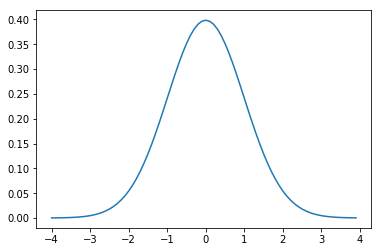

In [71]:
# Hipótesis nula
media2 = 8
# Realizamos la prueba de hipotesis para H0= mu=media2
ho = st.ttest_1samp(X,media2)
print('La prueba de hipótesis arroja como resultado\n',ho)
# Calculamos el estadístico normalizado
t = (np.mean(X)-media2)/(np.std(X)/np.sqrt(N))
print(t)

# Gráfica t-student
# %matplotlib inline
dat = np.arange(-4,4,.1)
# for i in range(1):
y = st.t.pdf(dat,df=N-1)
plt.plot(dat,y)
plt.show()


# Pruebas de bondad y ajuste



In [8]:
#### Método chi cuadrado
F_obse = [68,75,57,79,32,45,33,31]
F_espe = [66.43,79.72,59.79,73.07,33.57,40.28,30.21,36.93]

x2 = st.chisquare(F_obse,F_espe)
print('Valor de chi cuadrado = ',list(x2)[0])

Ji = st.chi2.ppf(q = 0.9,df=3)
print('Estadístico de Ji = ',Ji)
st.t.interval

Valor de chi cuadrado =  2.76438804576
Estadístico de Ji =  6.25138863117


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>